## Solving Linear Systems of Equations.

When solving linear systems of equations, two common methods that arise in numerical analysis and linear algebra are **triangular backsubstitution** and **Gauss elimination**. Each has its specific context and efficiency considerations. Here's an explanation of both methods and their respective uses:

### 1. Triangular Backsubstitution

**Triangular backsubstitution** is a method used to solve a linear system of equations where the coefficient matrix is already in an upper or lower triangular form. 

#### Upper Triangular System:
For an upper triangular matrix $ U $ and a vector $ b $, the system $ Ux = b $ can be solved starting from the last equation and proceeding upwards:
- $ U $ is upper triangular if all entries below the main diagonal are zero.
- Start solving from the bottom-most equation where you have the least number of unknowns, and substitute backwards to solve for all variables.

#### Steps for Backsubstitution:
1. For an upper triangular matrix $ U $ of size $ n \times n $, start with the last equation $ u_{nn}x_n = b_n $ and solve for $ x_n $.
2. Substitute the value of $ x_n $ back into the previous equation to solve for $ x_{n-1} $, and continue this process up to $ x_1 $.

**Advantages**:
- Efficient for triangular matrices, requiring only $ O(n^2) $ operations for backsubstitution.

### 2. Gauss Elimination

**Gauss elimination** is a method used to solve a general system of linear equations by systematically transforming the coefficient matrix into an upper triangular form, which can then be solved by backsubstitution.

#### Steps for Gauss Elimination:
1. **Forward Elimination**: Process the matrix row by row, eliminating variables to create zeros below the main diagonal, transforming the matrix into an upper triangular form.
2. **Backsubstitution**: Once the matrix is in upper triangular form, solve using backsubstitution as described above.

**Advantages**:
- Can be applied to any square system of linear equations.
- Combined with partial or complete pivoting, it is more numerically stable and can handle a wider range of systems.

### Comparison and Use Cases

- **Complexity**: Both methods fundamentally involve $ O(n^3) $ operations, with Gauss elimination focusing on the transformation to upper triangular form and backsubstitution taking $ O(n^2) $. Thus, if a matrix is already triangular, directly applying backsubstitution is more efficient.
- **Applicability**: Gauss elimination is more universally applicable as it can start with any matrix, while backsubstitution requires a pre-condition of having a triangular matrix.
- **Stability and Accuracy**: Gauss elimination with pivoting is generally more stable numerically than simple backsubstitution, especially for ill-conditioned matrices.

In practice, **Gauss elimination** is part of a broader class of matrix factorization methods used for solving linear systems, including LU decomposition, where the matrix is factored into a product of a lower and an upper triangular matrix. This LU factorization is essentially a step further from Gauss elimination that allows for the system to be solved for multiple right-hand sides efficiently.

### Conclusion

Selecting between these methods depends on the specific characteristics of the system to be solved. If the matrix is already triangular, backsubstitution is straightforward and efficient. For more general cases, especially where matrix stability and multiple solutions are considerations, Gauss elimination or its variants (with pivoting and factorizations) is preferable.

In [1]:
function backsubstitution(U, b)
    n = length(b)
    x = zeros(Float64, n)
    
    # Start from the last row and go upwards
    for i in n:-1:1
        if U[i, i] == 0
            throw(DivideError("Matrix is singular!"))
        end
        
        x[i] = b[i] / U[i, i]
        
        for j in 1:i-1
            b[j] -= U[j, i] * x[i]
        end
    end
    
    return x
end

# Example usage:
U = [2.0 3.0 1.0; 0.0 4.0 -1.0; 0.0 0.0 5.0]
b = [5.0, 6.0, -3.0]

# Perform backsubstitution
x = backsubstitution(U, b)
println("Solution x: ", x)


Solution x: [0.7749999999999995, 1.35, -0.6]


The above example of how to implement backsubstitution in Julia for solving a linear system $Ux = b$, where $U$ is an upper triangular matrix.


### Explanation of the Code

1. **Function Definition**:
   - The `backsubstitution` function takes an upper triangular matrix `U` and a vector `b` as inputs.

2. **Initialization**:
   - `n = length(b)`: Determines the size of the system.
   - `x = zeros(Float64, n)`: Initializes the solution vector `x` to zeros.

3. **Backsubstitution Loop**:
   - The outer loop iterates from the last row to the first row (`n:-1:1`).
   - For each row `i`, it first checks if the diagonal element `U[i, i]` is zero, which would indicate a singular matrix (no unique solution).
   - `x[i] = b[i] / U[i, i]`: Solves for the `i`-th variable.
   - The inner loop updates the `b` vector by subtracting the contribution of the solved variable `x[i]` from the rows above.

4. **Example Usage**:
   - The matrix `U` and vector `b` are defined as examples.
   - The `backsubstitution` function is called to solve the system.
   - The solution vector `x` is printed.

### Running the Code
When you run this code in Julia, you should see the solution vector `x` printed, which solves the system $Ux = b$.

### Handling Singular Matrices
The code includes a check for singular matrices (where diagonal elements are zero), which would lead to a divide-by-zero error. This check raises an error if encountered, ensuring the function does not proceed with an invalid operation.

This code provides a straightforward implementation of backsubstitution for solving linear systems with upper triangular matrices, suitable for educational purposes or as a component in more complex numerical methods.

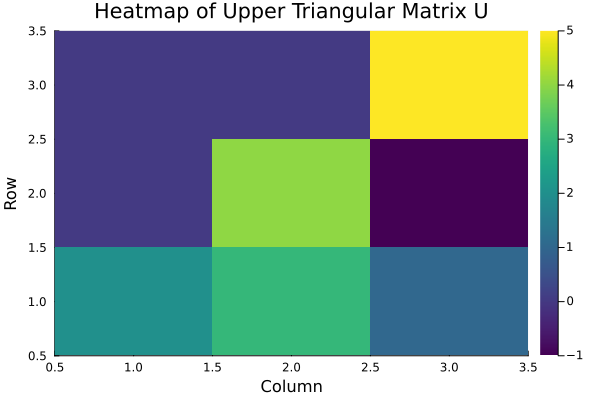

In [10]:
using Plots

# Generate the heatmap
heatmap(U, title="Heatmap of Upper Triangular Matrix U", xlabel="Column", ylabel="Row", c=:viridis)
# heatmap!(b)

# Display the plot
plot!()
